In [1]:
import pandas as pd

# Read the CSV files into pandas DataFrames
file1 = pd.read_csv("p1.csv")
file2 = pd.read_csv("p2.csv")
file3 = pd.read_csv("p3.csv")

# Concatenate the DataFrames vertically to combine them
combined_df = pd.concat([file1, file2, file3], ignore_index=True)

# Create a new column called "paragraph" and assign the paragraph information to it
combined_df['paragraph'] = ["Paragraph 1"] * len(file1) + ["Paragraph 2"] * len(file2) + ["Paragraph 3"] * len(file3)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_data.csv", index=False)

In [ ]:
import pandas as pd
import json

# Load the CSV files into pandas DataFrames
ada_df = pd.read_csv("combined_data.csv")

# Load the JSON data containing publications with the appropriate encoding (e.g., utf-8)
with open("data_authors.json", "r", encoding="utf-8") as json_file:
    publications_data = json.load(json_file)

# Create a DataFrame from the JSON data
publications_df = pd.DataFrame(publications_data)

# Merge the publications DataFrame with the combined DataFrame based on the 'name' column
ada_df = pd.merge(ada_df, publications_df[['name', 'publications']], left_on='Name', right_on='name', how='left')

# Drop the redundant 'name' column from the merged DataFrame
ada_df.drop(columns=['name'], inplace=True)

# Save the combined DataFrame to a new CSV file
ada_df.to_csv("combined_authors_with_publications.csv", index=False)


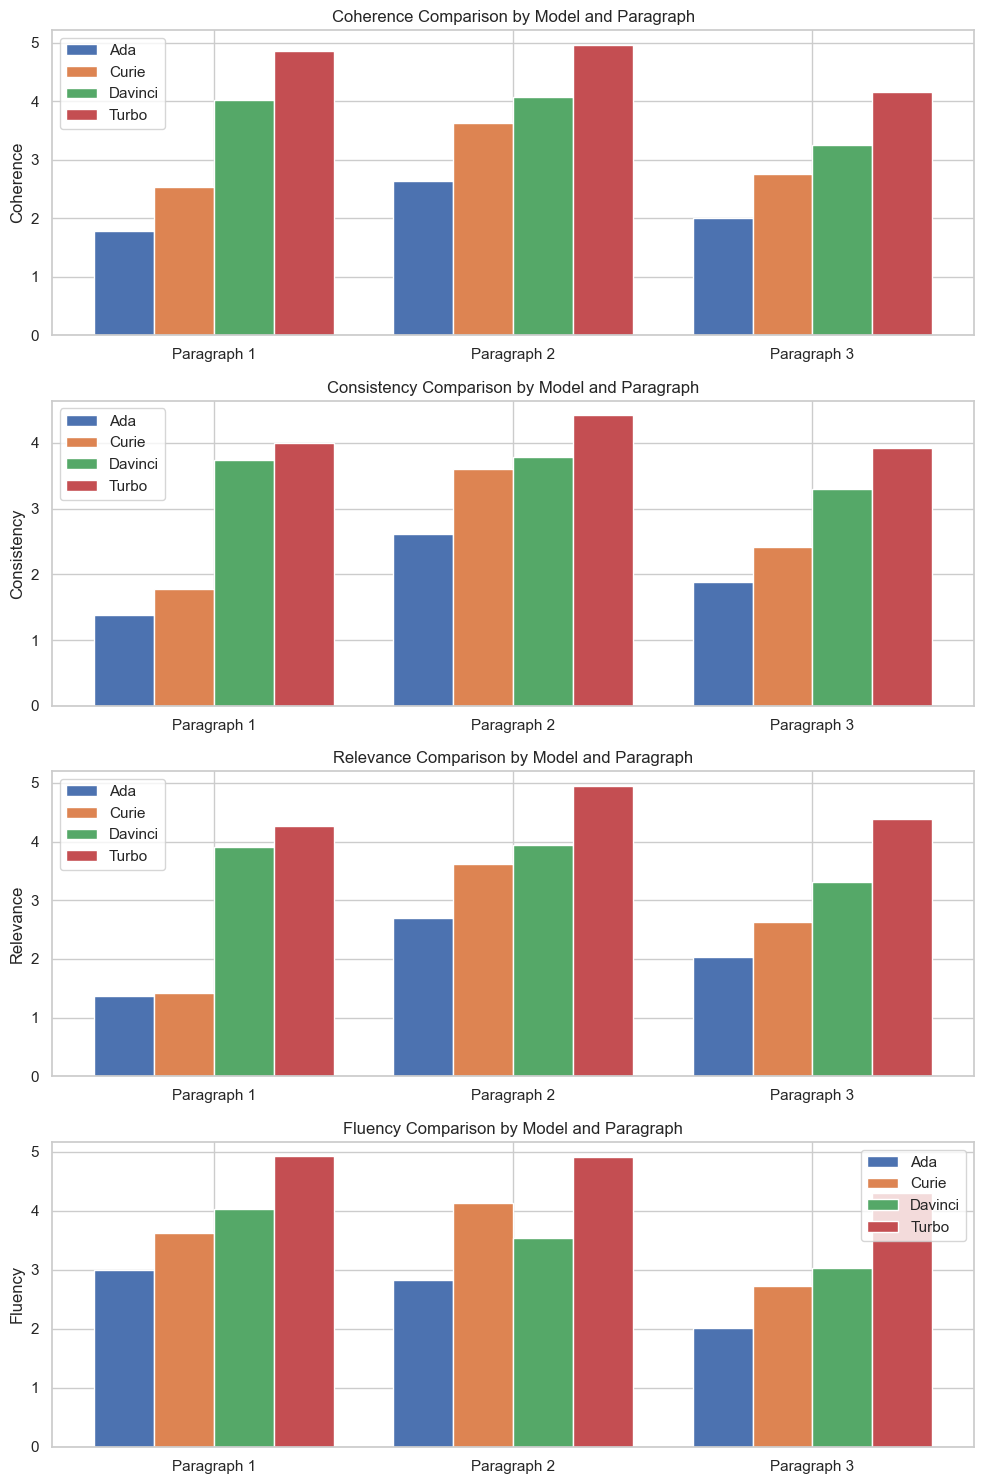

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
paragraphs = ['Paragraph 1', 'Paragraph 2', 'Paragraph 3']
models = ['Ada', 'Curie', 'Davinci', 'Turbo']

coherence_values = {
    'Ada': [1.783, 2.633, 2.0],
    'Curie': [2.533, 3.633, 2.75],
    'Davinci': [4.016, 4.083, 3.25],
    'Turbo': [4.867, 4.967, 4.167]
}

consistency_values = {
    'Ada': [1.383, 2.617, 1.883],
    'Curie': [1.783, 3.6, 2.417],
    'Davinci': [3.733, 3.783, 3.3],
    'Turbo': [4.0, 4.417, 3.917]
}

relevance_values = {
    'Ada': [1.367, 2.7, 2.033],
    'Curie': [1.417, 3.617, 2.633],
    'Davinci': [3.9, 3.95, 3.317],
    'Turbo': [4.267, 4.95, 4.383]
}

fluency_values = {
    'Ada': [3.0, 2.817, 2.017],
    'Curie': [3.617, 4.133, 2.717],
    'Davinci': [4.033, 3.533, 3.033],
    'Turbo': [4.917, 4.9, 4.3]
}

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

categories = ['Coherence', 'Consistency', 'Relevance', 'Fluency']
data = [coherence_values, consistency_values, relevance_values, fluency_values]

for i, ax in enumerate(axes):
    x = np.arange(len(paragraphs))
    width = 0.2
    for j, model in enumerate(models):
        ax.bar(x + j * width, data[i][model], width=width, label=model)

    ax.set_ylabel(categories[i])
    ax.set_xticks(x + width * (len(models) - 1) / 2)
    ax.set_xticklabels(paragraphs)
    ax.legend()

# Set titles
axes[0].set_title('Coherence Comparison by Model and Paragraph')
axes[1].set_title('Consistency Comparison by Model and Paragraph')
axes[2].set_title('Relevance Comparison by Model and Paragraph')
axes[3].set_title('Fluency Comparison by Model and Paragraph')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [38]:
import pandas as pd
from scipy import stats
import json

# Create dataframes for the first and second groups
data_group1 = pd.DataFrame({
    'Model': ['ada', 'curie', 'davinci', 'turbo'],
    'F1_Score': [0.63471, 0.132369, 0.258645, 0.251384],
    'Rouge1': [0.260688, 0.3974, 0.467173, 0.486424],
    'Rouge2': [0.065746, 0.135817, 0.26883, 0.269856],
    'Bleu': [0.017435, 0.038858, 0.09019, 0.106317]
})

data_group2 = pd.DataFrame({
    'Model': ['ada', 'curie', 'davinci', 'turbo'],
    'Consistency': [1.783333333, 2.533333333, 4.016666667, 4.866666667],
    'Coherence': [1.383333333, 1.783333333, 3.733333333, 4],
    'Relevance': [1.366666667, 1.416666667, 3.9, 4.266666667],
    'Fluency': [3, 3.616666667, 4.033333333, 4.916666667]
})

# Define the list of metrics for group 1 and group 2
metrics_group1 = ['F1_Score', 'Rouge1', 'Rouge2', 'Bleu']
metrics_group2 = ['Consistency', 'Coherence', 'Relevance', 'Fluency']

# Create a list to store the results
results = []

# Loop through metrics in group 1 and group 2
alpha = 0.05  # Significance level

for metric1 in metrics_group1:
    for metric2 in metrics_group2:
        group1_data = data_group1[metric1]
        group2_data = data_group2[metric2]

        # Perform independent samples t-test
        t_statistic, p_value = stats.ttest_ind(group1_data, group2_data)

        # Determine significance and convert to string
        is_significant = "Yes" if p_value < alpha else "No"

        # Add the results to the list
        result_dict = {
            "Metric Group 1": metric1,
            "Metric Group 2": metric2,
            "T-Statistic": t_statistic,
            "P-Value": p_value,
            "Significant Difference": is_significant
        }

        results.append(result_dict)

# Write the results to a JSON file
with open("t_test_results.json", "w") as json_file:
    json.dump(results, json_file, indent=4)

print("Results saved to 't_test_results.json'.")


Results saved to 't_test_results.json'.


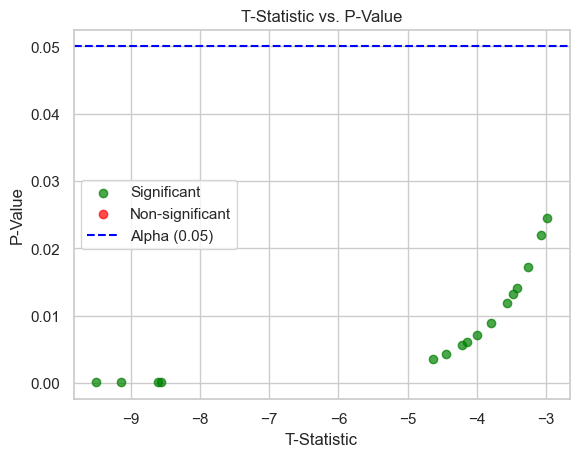

Results saved to 't_test_results.json'.


In [42]:


import pandas as pd
from scipy import stats
import json
import matplotlib.pyplot as plt

# Create dataframes for the first and second groups
data_group1 = pd.DataFrame({
    'Model': ['ada', 'curie', 'davinci', 'turbo'],
    'F1_Score': [0.63471, 0.132369, 0.258645, 0.251384],
    'Rouge1': [0.260688, 0.3974, 0.467173, 0.486424],
    'Rouge2': [0.065746, 0.135817, 0.26883, 0.269856],
    'Bleu': [0.017435, 0.038858, 0.09019, 0.106317]
})

data_group2 = pd.DataFrame({
    'Model': ['ada', 'curie', 'davinci', 'turbo'],
    'Consistency': [1.783333333, 2.533333333, 4.016666667, 4.866666667],
    'Coherence': [1.383333333, 1.783333333, 3.733333333, 4],
    'Relevance': [1.366666667, 1.416666667, 3.9, 4.266666667],
    'Fluency': [3, 3.616666667, 4.033333333, 4.916666667]
})

# Create a list to store the results
results = []

# Create empty lists to store T-statistics and p-values
t_statistics = []
p_values = []

# Create empty lists to store significant and non-significant results
significant_results = []
non_significant_results = []

# Loop through metrics in group 1 and group 2
alpha = 0.05  # Significance level

for metric1 in metrics_group1:
    for metric2 in metrics_group2:
        group1_data = data_group1[metric1]
        group2_data = data_group2[metric2]

        # Perform independent samples t-test
        t_statistic, p_value = stats.ttest_ind(group1_data, group2_data)

        # Append T-statistic and p-value to the lists
        t_statistics.append(t_statistic)
        p_values.append(p_value)

        # Determine significance and convert to string
        is_significant = "Yes" if p_value < alpha else "No"

        # Add the results to the list
        result_dict = {
            "Metric Group 1": metric1,
            "Metric Group 2": metric2,
            "T-Statistic": t_statistic,
            "P-Value": p_value,
            "Significant Difference": is_significant
        }

        results.append(result_dict)

        # Separate significant and non-significant results
        if p_value < alpha:
            significant_results.append((t_statistic, p_value))
        else:
            non_significant_results.append((t_statistic, p_value))

# Write the results to a JSON file
with open("t_test_results.json", "w") as json_file:
    json.dump(results, json_file, indent=4)

# Create a scatter plot of T-statistics vs. p-values
t_statistics = np.array(t_statistics)
p_values = np.array(p_values)

# Determine significance and convert to boolean values
is_significant = p_values < alpha

# Plot significant results in green and non-significant results in red
plt.scatter(t_statistics[is_significant], p_values[is_significant], c='green', label='Significant', alpha=0.7)
plt.scatter(t_statistics[~is_significant], p_values[~is_significant], c='red', label='Non-significant', alpha=0.7)

plt.xlabel("T-Statistic")
plt.ylabel("P-Value")
plt.title("T-Statistic vs. P-Value")
plt.axhline(y=alpha, color='blue', linestyle='--', label=f"Alpha ({alpha})")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

print("Results saved to 't_test_results.json'.")

